# Setup

## Libs

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
 
sns.set_style("white") # change le style par défaut des graphiques seaborn
%matplotlib inline

## Load file

In [349]:
df = pd.read_csv("data/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Rééquilibrage 

In [350]:
print(len(df))

df_heart_disease = df[df['HeartDisease'] == "Yes"]
df_no_heart_disease = df[df['HeartDisease'] == "No"]
print("Différence : ", len(df_no_heart_disease)-len(df_heart_disease))

test = list(range(0, len(df_no_heart_disease)-len(df_heart_disease)))
df_no_heart_disease = df_no_heart_disease.drop(df_no_heart_disease.index[test])


df_new = pd.concat([df_heart_disease, df_no_heart_disease])
df = df_new
df_new.head()

print(len(df_new))
print(len(df_heart_disease))
print(len(df_no_heart_disease))


319795
Différence :  265049
54746
27373
27373


## Clean (i hope)

### Clean Yes/No to 1/0

In [351]:
column_to_change = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
d = dict()
for c in column_to_change:
    d[c] = {"No": 0, "Yes": 1, "No, borderline diabetes": 0, "Yes (during pregnancy)": 0}
df = df.replace(d)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,Female,75-79,Black,0,0,Fair,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,Male,60-64,White,1,0,Poor,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,Male,75-79,White,1,1,Poor,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,Female,80 or older,White,1,0,Good,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,Female,75-79,White,1,1,Fair,8.0,0,1,0


### Change categoricals columns

In [352]:
heart_orig = df

In [353]:
# We can find 4 more categorical variables which are not yes/no. The dtype is object for these 4. Let us convert them into dummy variables.
categoricals = df.select_dtypes(include=['object'])
categoricals.head()
cat_dummies = pd.get_dummies(categoricals)
cat_dummies.head()
# Drop the redundant columns
df.drop(list(categoricals.columns), axis=1, inplace=True)
# concat the heart and dummies data frames.
df = pd.concat([df, cat_dummies], axis=1)

In [354]:
df.head(100)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
5,1,28.87,1,0,0,6.0,0.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
35,1,32.98,1,0,1,10.0,0.0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
42,1,25.06,0,0,0,0.0,0.0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
43,1,30.23,1,0,0,6.0,2.0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,1,30.34,1,0,0,3.0,5.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
659,1,30.61,0,0,0,30.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
667,1,24.28,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
669,1,35.62,1,0,0,0.0,7.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


# Analyse

## Correlation

### With categorical data splitted

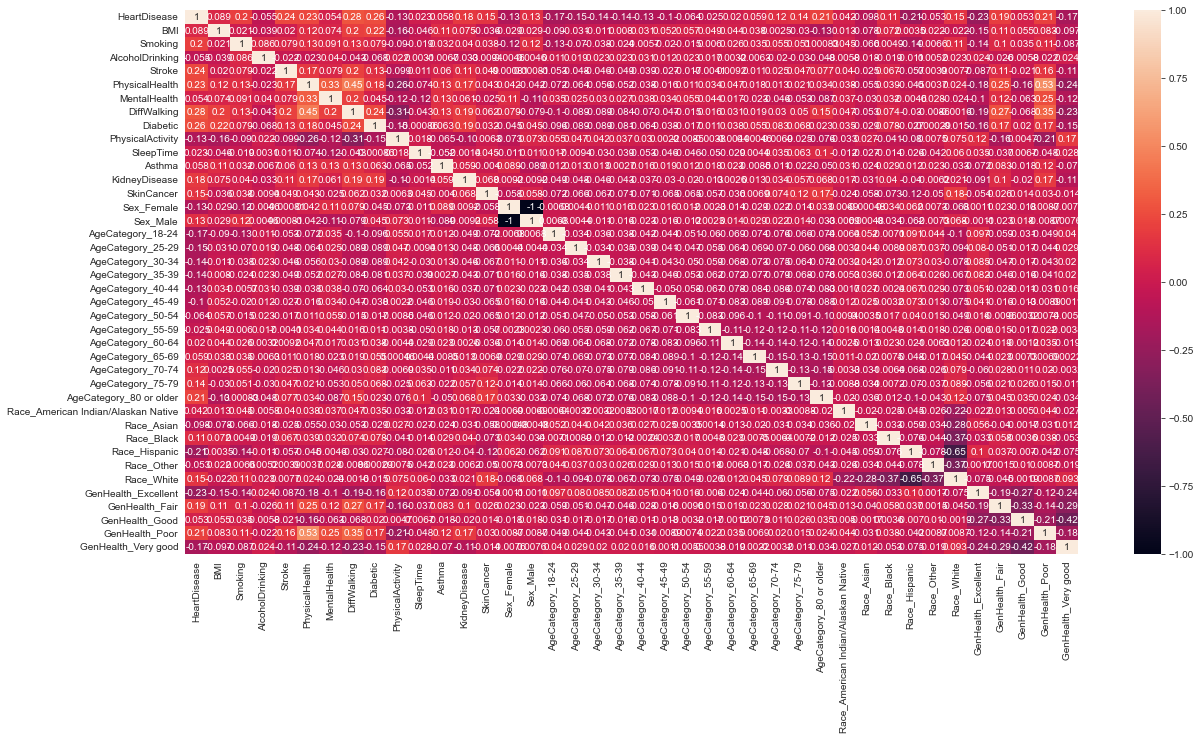

In [355]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

### Without categorical data

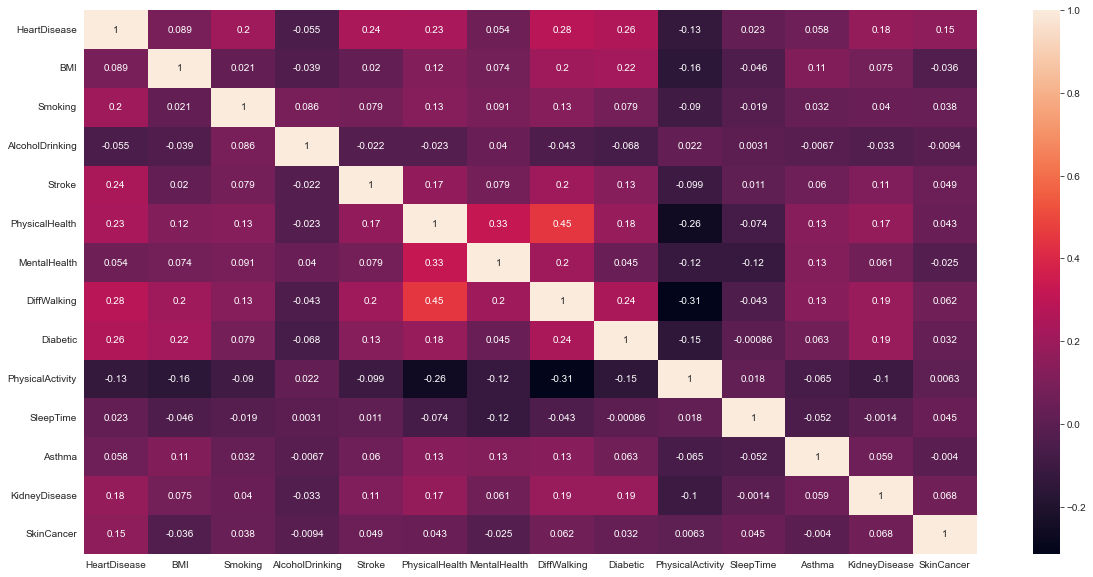

In [356]:
plt.figure(figsize = (20,10))
sns.heatmap(heart_orig.corr(),annot = True)
plt.show()

# Setup for models

## Splitting dataset

In [357]:
# Here we are interested in the chance of having the heart disease based on other variables.
# Let y be HeartDisease column
y = df.pop('HeartDisease')
X = df
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
5,28.87,1,0,0,6.0,0.0,1,0,0,12.0,...,0,1,0,0,0,0,1,0,0,0
10,34.30,1,0,0,30.0,0.0,1,1,0,15.0,...,0,0,0,0,1,0,0,0,1,0
35,32.98,1,0,1,10.0,0.0,1,1,1,4.0,...,0,0,0,0,1,0,0,0,1,0
42,25.06,0,0,0,0.0,0.0,1,1,0,7.0,...,0,0,0,0,1,0,0,1,0,0
43,30.23,1,0,0,6.0,2.0,1,1,1,8.0,...,0,0,0,0,1,0,1,0,0,0


In [358]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
314172,27.34,0,0,0,0.0,0.0,1,1,1,6.0,...,1,0,0,0,0,0,0,1,0,0
2462,34.67,1,0,1,0.0,0.0,1,1,1,7.0,...,0,0,0,0,1,0,0,1,0,0
316263,24.75,1,0,0,0.0,0.0,0,0,1,6.0,...,0,0,1,0,0,0,0,1,0,0
168857,30.18,0,0,0,0.0,0.0,0,1,1,7.0,...,0,0,0,0,1,0,0,1,0,0
303130,35.57,0,0,0,2.0,0.0,0,0,1,5.0,...,0,0,0,0,1,0,0,0,0,1


In [359]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
314172,27.34,0,0,0,0.0,0.0,1,1,1,6.0,...,1,0,0,0,0,0,0,1,0,0
2462,34.67,1,0,1,0.0,0.0,1,1,1,7.0,...,0,0,0,0,1,0,0,1,0,0
316263,24.75,1,0,0,0.0,0.0,0,0,1,6.0,...,0,0,1,0,0,0,0,1,0,0
168857,30.18,0,0,0,0.0,0.0,0,1,1,7.0,...,0,0,0,0,1,0,0,1,0,0
303130,35.57,0,0,0,2.0,0.0,0,0,1,5.0,...,0,0,0,0,1,0,0,0,0,1


## Scale

In [360]:
# Scale X variables - should have done before spliting
from sklearn.preprocessing import scale
# rescale the features of Xtrain
cols = X_train.columns
X_train = pd.DataFrame(scale(X_train))
X_train.columns = cols
# rescale the features of Xtest
cols = X_test.columns
X_test = pd.DataFrame(scale(X_test))
X_test.columns = cols

# not optimized models

## XGBoost Classifier with Bagging and Boosting

In [361]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


# Init classifier
xgb_cl = xgb.XGBClassifier()

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=xgb_cl, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

Train score: 0.6671102760816241
Test score: 0.6581831466147102


0.7630905991232343

In [362]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# The base learner will be a decision tree with depth = 2
xgb_cl = xgb.XGBClassifier()

adaboost = AdaBoostClassifier(base_estimator=xgb_cl, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(X_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Train score: 0.49950420124210637
Test score: 0.5011568436434486
Accuracy: 0.7630905991232343


## Decision Tree Classifier with Bagging and Boosting

In [363]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(X_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(X_train, y_train)}")
print(f"Test score: {bagging.score(X_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.6542456030478576
Test score: 0.6471018022406235
Accuracy: 0.6986726741354116


In [364]:
from sklearn.ensemble import AdaBoostClassifier

# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)


adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(X_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(X_train, y_train)}")
print(f"Test score: {adaboost.score(X_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.7098272532748813
Test score: 0.7090233804188991
Accuracy: 0.6706039941548952


## Naive Bayes Classifier

In [365]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7442766682903069


## Logistic Regression

In [366]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7676570871894788


## K Neighbours Classifier

In [367]:
# from sklearn.neighbors import KNeighborsClassifier
 
# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print(accuracy_score(y_test, y_pred))

# Random Forest Classifier

Random Forest Train accuracy: 0.662 Test accuracy 0.666


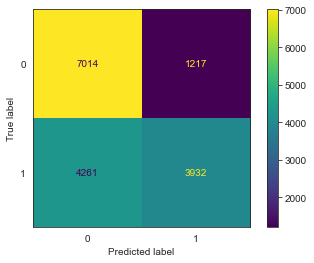

In [368]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

classifierRandomForest = RandomForestClassifier(
    max_depth=2, n_estimators=2, random_state=100, criterion='entropy')


def calculate_accuracy(classifier, X_train, X_test, y_train, y_test, modelName):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print(modelName, 'Train accuracy:', '{:.3f}'.format(
        accuracy_train), 'Test accuracy', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier


accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(
    classifierRandomForest, X_train, X_test, y_train, y_test, modelName="Random Forest")
metrics.ConfusionMatrixDisplay.from_estimator(
    trained_classifier, X_test, y_test)


## Which models are promising?